<a href="https://colab.research.google.com/github/teacher-jiejie/2021-AI-class/blob/images/%EB%94%A5%EB%9F%AC%EB%8B%9D(%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EB%AF%B8%EB%9E%98%EC%82%AC%ED%9A%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 딥러닝의 기본단위 : 퍼셉트론(Perceptron)

퍼셉트론 = 인간의 신경 세포 뉴런과 유사한 형태


<img src='https://miro.medium.com/proxy/1*3UpdymQx-C1tBKRnfD7eOg.gif'>

<br/>
<br/>


# 3. 단층 퍼셉트론과 다층 퍼셉트론

<img src='https://github.com/Ahnjihye/2021-AI-class/blob/images/%EB%94%A5%EB%9F%AC%EB%8B%9D%20017.png?raw=true' width=800>



*   단층 퍼셉트론은 입력층 - 출력층만 있는 형태
*   다층 퍼셉트론은 입력측 - 은닉층 - 출력층이 있는 형태 

<br/>





## 인간의 손글씨 인식시켜보기

### 손글씨 이미지 구성 - MNIST 
- 손글씨 이미지 0부터 9까지 총10개 
- 손글씨 0~9 = 총 10개 * 각 600개 = 총 60000개
- 학습 데이터 60000개, 테스트 데이터 10000개로 구성
- 0~9까지의 숫자 이미지를 구분하는 것은 회귀인가? 분류인가?
- 각 숫자 이미지는 28 pixel * 28 pixel  

<br/>
<img src = "https://korchris.github.io/images/overview_mnist.png" width=500> 
<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRiYU_Wf8GiLoaAXWiCdJHm87IWjpOfTClkwg&usqp=CAU' width=200>


## 1) 데이터 로드


```
from keras.datasets import mnist

(data_x, data_y), (test_x, test_y) = mnist.load_data()
```



In [ ]:
# step 1 
from keras.datasets import mnist
 
(data_x, data_y), (test_x, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step



위 코드를 실행하면

*   data_x에는 784개의 픽셀값(이미지)이 자동으로 저장됨
*   data_y에는 해당 이미지의 숫자(0~9 중 하나)가 저장됨


In [ ]:
# step 2
# 첫번째 숫자 이미지 살펴보기
print(data_x[0] )

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

조금 더 예쁘게 출력해보자!

```
# 숫자 하나마다 탭 길이만큼 공백을 주어 출력하는 코드

import sys

for x in 숫자이미지 :
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')
```

In [ ]:
# step 3
import sys
 
for x in data_x[0] :
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [ ]:
# step 4
# 첫번째 이미지에 해당하는 숫자는? 
print( data_y[0] )

5


0~255까지의 숫자로 구성된 파일을 흑백 이미지로 보여주기 

```
import matplotlib.pyplot as plt

plt.imshow(숫자리스트, cmap='gray') 
plt.show()
```



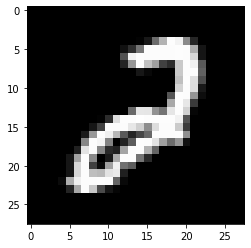

2


In [ ]:
# step 5
import matplotlib.pyplot as plt
 
plt.imshow(data_x[555], cmap='gray') 
plt.show()

# 이 이미지에 해당하는 숫자는?
print( data_y[555] )

출력을 10개로 만들기 (원 핫 인코딩하기)

```
import tensorflow.keras.utils as utils

data_y = utils.to_categorical(data_y, 10)
test_y = utils.to_categorical(test_y, 10)
```

In [ ]:
# step 6 (주어진 코드 실행)
import tensorflow.keras.utils as utils

data_y = utils.to_categorical(data_y, 10)
test_y = utils.to_categorical(test_y, 10)

> Q. 손글씨 딥러닝 모델의 입력층 개수는?

<img src='https://t1.daumcdn.net/cfile/tistory/998BAF475BECAB3B26' width=800>
<br/><br/>

> Q. 출력층의 개수는?

<img src='https://thumbs.gfycat.com/ActiveCourteousAmericanindianhorse-small.gif' width=600>

딥러닝 모델 두 개 비교해보자!



1.   단층 퍼셉트론 (입력층과 출력층만 있는 모델)
2.   다층 퍼셉트론 (입력층 - 은닉층 - 출력층, 은닉층이 있는 모델)

<img src='https://github.com/Ahnjihye/2021-AI-class/blob/images/%EB%94%A5%EB%9F%AC%EB%8B%9D%20023.png?raw=true' width=800>



# model1 : 은닉층이 없는 단층 퍼셉트론 
**입력층(노드 784) -> 출력층(노드 10)**

<img src='https://github.com/Ahnjihye/2021-AI-class/blob/images/%EB%94%A5%EB%9F%AC%EB%8B%9D%20024.png?raw=true' width=500>

**딥러닝 모델(구조) 생성하기**

```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 층을 쌓을 수 있는 모델 생성
모델이름 = Sequential()
모델이름.add(Flatten())

# 모델에 층 추가 
# 층은 Dense, input_dim 옵션에 입력층 노드 개수  
모델이름.add(Dense( 빈칸 , input_dim = 빈칸 , activation='softmax'))

# 만든 딥러닝 구조를 컴파일
모델이름.compile(loss='categorical_crossentropy', 
               optimizer='adam', metrics=['accuracy'])
```



In [ ]:
# step 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
 
# 층을 쌓을 수 있는 모델 생성
model1 = Sequential()
model1.add(Flatten())
 
# 모델에 층 추가 
# 층은 Dense, input_dim 옵션에 입력층 노드 개수  
model1.add(Dense( 10 , input_dim = 784 , activation='softmax'))
 
# 만든 딥러닝 구조를 컴파일
model1.compile(loss='categorical_crossentropy', 
               optimizer='adam', metrics=['accuracy'])

**딥러닝 모델(구조) 학습시키기**

```
# 딥러닝 구조에 데이터를 넣어 학습시키기
모델이름.fit( 빈칸 , 빈칸, 
           epochs=10, batch_size =200 , verbose=1)
```



In [ ]:
# step 8
model1.fit( data_x , data_y, 
           epochs=10, batch_size =200 , verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 3ms/step - loss: 13.4740 - accuracy: 0.7968
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 5.0784 - accuracy: 0.8774
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 4.0083 - accuracy: 0.8836
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 3.3825 - accuracy: 0.8867
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 2.9939 - accuracy: 0.8887
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 2.7535 - accuracy: 0.8921
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 2.5793 - accuracy: 0.8912
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 2.4455 - accuracy: 0.8918
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 2.3522 - accuracy: 0.8929
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 2.1903 - accuracy: 0.893



*   Q.  model1의 최종 정확도는? 
<br/>
=> 89.32점 



**완성한 딥러닝 모델(구조)에게 새로운 데이터 예측시켜보기** --> model1

```
# 예측에 사용할 이미지 확인해보기
plt.imshow( 예측에 사용할 이미지 , cmap='gray') 
plt.show()
```



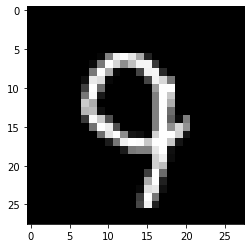

In [ ]:
# step 9 - 예측시킬 이미지 확인
plt.imshow( test_x[999] , cmap='gray') 
plt.show()


```
import numpy as np

print(np.argmax(모델이름.predict( 예측할이미지 .reshape(-1, 28, 28, 1))))
```



In [ ]:
# step 10 - model1에게 위 이미지 예측시켜보기
import numpy as np
 
print(np.argmax(model1.predict( test_x[999] .reshape(-1, 28, 28, 1))))


7


# model2 : 은닉층을 추가해 돌려보자 
**입력층(노드 784) -> 은닉층(노드 512)-> 출력층(노드 10)**

<img src='https://github.com/Ahnjihye/2021-AI-class/blob/images/%EB%94%A5%EB%9F%AC%EB%8B%9D%20025.png?raw=true' width=500>


**딥러닝 모델(구조) 생성하기**

```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 층을 쌓을 수 있는 모델 생성
모델이름 = Sequential()
모델이름.add(Flatten())

# 모델에 층 추가 : 입력층 784 --> 은닉층 512
모델이름.add(Dense( 빈칸 , input_dim = 빈칸 , activation='relu'))

# 모델에 층 추가 : 은닉층 512 -> 출력층 10
모델이름.add(Dense( 빈칸 , activation='softmax'))

# 만든 딥러닝 구조를 컴파일
모델이름.compile(loss='categorical_crossentropy', 
               optimizer='adam', metrics=['accuracy'])
```



In [ ]:
# step 11
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
 
# 층을 쌓을 수 있는 모델 생성
model2 = Sequential()
model2.add(Flatten())
 
# 모델에 층 추가 : 입력층 784 --> 은닉층 512
model2.add(Dense( 512 , input_dim = 784 , activation='relu'))
 
# 모델에 층 추가 : 은닉층 512 -> 출력층 10
model2.add(Dense( 10 , activation='softmax'))
 
# 만든 딥러닝 구조를 컴파일
model2.compile(loss='categorical_crossentropy', 
               optimizer='adam', metrics=['accuracy'])

**딥러닝 모델(구조)에 데이터 학습시키기**


```
모델이름.fit( 빈칸 , 빈칸 ,
           epochs=10, batch_size =200 , verbose=1)
```



In [ ]:
# step 12 - 딥러닝 구조에 데이터를 넣어 학습시키기
model2.fit( data_x , data_y ,
           epochs=10, batch_size =200 , verbose=1)

Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 5.2266 - accuracy: 0.9016
Epoch 2/10
300/300 [==============================] - 3s 12ms/step - loss: 0.7515 - accuracy: 0.9542
Epoch 3/10
300/300 [==============================] - 4s 12ms/step - loss: 0.3366 - accuracy: 0.9693
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2198 - accuracy: 0.9763
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1808 - accuracy: 0.9808
Epoch 6/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1534 - accuracy: 0.9826
Epoch 7/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1498 - accuracy: 0.9833
Epoch 8/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1371 - accuracy: 0.9829
Epoch 9/10
300/300 [==============================] - 3s 12ms/step - loss: 0.1214 - accuracy: 0.9852
Epoch 10/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1526 - accura



*   Q1.  model2의 최종 정확도는? 
<br/>
=> 98.26점
<br/><br/>
*   Q2.  model1과 비교했을 때 model2의 성능은 어떠한가?  
<br/>
=> 더 높다.
<br/><br/>
*   Q3.  왜 위와 같은 결과가 나왔을까?<br/>
=> 은닉층을 추가한 다층 퍼셉트론이기 때문
<br/><br/>



**model2에게 새로운 데이터 예측시켜보기**


```
# model2에게 예측시킬 이미지
plt.imshow(예측시킬 이미지, cmap='gray') 
plt.show()

# model2가 예측한 이미지
print(np.argmax(모델이름.predict(예측시킬 이미지.reshape(-1, 28, 28, 1))))
```



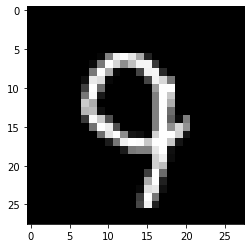

9


In [ ]:
# step 13
# model2에게 예측시킬 이미지
plt.imshow(test_x[999], cmap='gray') 
plt.show()
 
# model2가 예측한 이미지
print(np.argmax(model2.predict(test_x[999].reshape(-1, 28, 28, 1))))

# 내 손글씨 데이터를 예측시켜보자!

내 손글씨이미지 업로드하기 

```
from google.colab import files
uploaded = files.upload()
```



In [ ]:
# step 14
from google.colab import files
uploaded = files.upload()

Saving 9.png to 9.png


업로드된 이미지 확인하기


```
from tensorflow.keras.preprocessing import image

s = image.load_img('파일이름.png', target_size=(28, 28), color_mode="grayscale")
s
```



In [ ]:
# step 15
from tensorflow.keras.preprocessing import image
 
s = image.load_img('9.png', target_size=(28, 28), color_mode="grayscale")
s

내 손글씨 예측시켜보자!

```
img = image.img_to_array(s).astype('float32')

# model1에게 예측시켰을 때
print(np.argmax( 모델이름.predict(img.reshape(-1, 28, 28, 1))))

# model2에게 예측시켰을 때
print(np.argmax( 모델이름.predict(img.reshape(-1, 28, 28, 1))))
```



In [ ]:
# step 16
img = image.img_to_array(s).astype('float32')
 
# model1에게 예측시켰을 때
print(np.argmax( model1.predict(img.reshape(-1, 28, 28, 1))))
 
# model2에게 예측시켰을 때
print(np.argmax( model2.predict(img.reshape(-1, 28, 28, 1))))

7
9
